In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [15]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
inspector = inspect(engine)
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
        print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


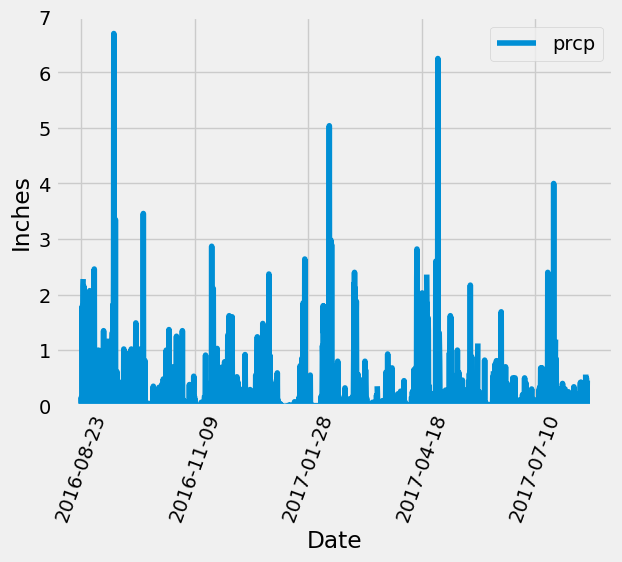

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
values = session.query(measurement.date, measurement.prcp).filter(measurement.date > "2016-08-22").order_by(measurement.date).all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
values_df = pd.DataFrame(values)
values_final_df = values_df.set_index("date")
values_final_df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0,7)
plt.xticks(rotation = 70)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()



In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
values_final_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(station.station).count()
total_number_stations

9

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(measurement.station,func.count(measurement.station)).order_by(func.count(measurement.station).desc()).group_by(measurement.station).all()
print(station_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).first()

most_active_station_number = most_active_station[0]
most_active_station_number 


lowest_temperature = session.query(func.min(measurement.tobs)).\
  filter(measurement.station==most_active_station_number).all()
print(lowest_temperature) 



highest_temperature = session.query(func.max(measurement.tobs)).\
  filter(measurement.station==most_active_station_number).all()

print(highest_temperature)


average_temperature = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_station_number).all()

print(average_temperature)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(0.0, 70.0)

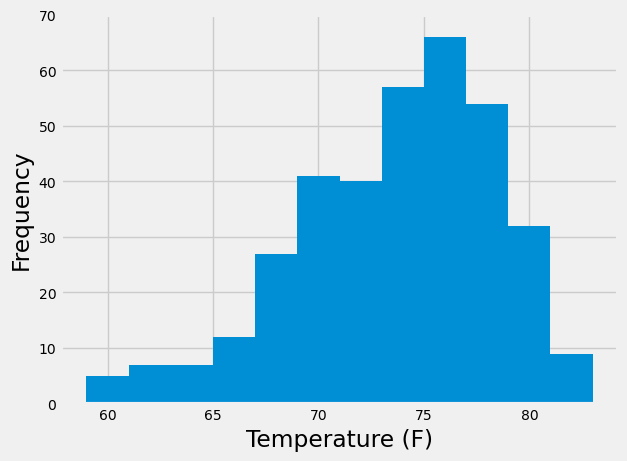

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date_station = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_number).\
    order_by(measurement.date.desc()).first()

twelve_month_values = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_number).\
    filter(measurement.date > '2016-08-17').all()


tobs_df = pd.DataFrame(twelve_month_values)["tobs"]
tobs_df 

hist = tobs_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0,70)

# Close session

In [32]:
# Close Session
session.close()